###행정 구역정보(CSV) 읽고 분석하기
* reand_csv() 함수로 csv file 읽기
* head(),tail().info() 데이터 확인
* 컬럼명을 변경
* 특정행과 열을 선택하기(loc[],iloc[])사용하기)

In [1]:
import pandas as pd

data = pd.read_csv('data/data_draw_korea.csv')
print(type(data))
print(data.shape)


<class 'pandas.core.frame.DataFrame'>
(229, 8)


In [2]:
data.head()

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
0,0,202520,강릉,11,4,1040.07,강원도,강릉시
1,1,25589,고성(강원),9,0,664.19,강원도,고성군
2,2,86747,동해,11,5,180.01,강원도,동해시
3,3,63986,삼척,11,8,1185.80,강원도,삼척시
4,4,76733,속초,9,1,105.25,강원도,속초시


In [3]:
data.tail()

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
224,224,127462,제천,8,10,882.47,충청북도,제천시
225,225,34480,증평,6,11,81.84,충청북도,증평군
226,226,62809,진천,5,11,406.08,충청북도,진천군
227,227,790216,청주,6,12,932.51,충청북도,청주시
228,228,198077,충주,6,10,983.70,충청북도,충주시


In [4]:
print('colums',data.columns)
print('index',data.index)
print('values',data.values)

colums Index(['Unnamed: 0', '인구수', 'shortName', 'x', 'y', '면적', '광역시도', '행정구역'], dtype='object')
index RangeIndex(start=0, stop=229, step=1)
values [[0 202520 '강릉' ... 1040.07 '강원도' '강릉시']
 [1 25589 '고성(강원)' ... 664.19 '강원도' '고성군']
 [2 86747 '동해' ... 180.01 '강원도' '동해시']
 ...
 [226 62809 '진천' ... 406.08 '충청북도' '진천군']
 [227 790216 '청주' ... 932.51 '충청북도' '청주시']
 [228 198077 '충주' ... 983.7 '충청북도' '충주시']]


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  229 non-null    int64  
 1   인구수         229 non-null    int64  
 2   shortName   229 non-null    object 
 3   x           229 non-null    int64  
 4   y           229 non-null    int64  
 5   면적          229 non-null    float64
 6   광역시도        229 non-null    object 
 7   행정구역        229 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 14.4+ KB


In [6]:
data.describe()

,Unnamed: 0,인구수,x,y,면적
count,229.000000,2.290000e+02,229.000000,229.000000,229.000000
mean,114.000000,2.110898e+05,6.117904,11.262009,435.419795
std,66.250786,2.074378e+05,3.320469,6.040898,381.612549
min,0.000000,8.392000e+03,0.000000,0.000000,2.800000
25%,57.000000,4.955900e+04,3.000000,6.000000,54.000000
50%,114.000000,1.401590e+05,6.000000,11.000000,436.400000
75%,171.000000,3.216180e+05,9.000000,16.000000,692.800000
max,228.000000,1.125461e+06,13.000000,25.000000,1817.940000


In [7]:
#인구수의 최대,최소,평균,중간값,합계,표준편차
print('최대',data['인구수'].max())
print('최소',data['인구수'].min())
print('평균',data['인구수'].mean())
print('중간값',data['인구수'].median())
print('합계',data['인구수'].count())
print('표준편차',data['인구수'].std())

최대 1125461
최소 8392
평균 211089.77729257641
중간값 140159.0
합계 229
표준편차 207437.8370475227


In [8]:
#unique한 광역시도명은?
data['광역시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [9]:
#경기도의 인구수 평균과 표준편차
경기인구수_평균 = data.loc[data['광역시도'] == '경기도','인구수'].mean()
print('평균',경기인구수_평균)
경기인구수_편차 = data.loc[data['광역시도'] == '경기도','인구수'].std()
print('편차',경기인구수_편차)
result = 경기인구수_평균 - 경기인구수_편차
print('차이',result)

평균 378845.48387096776
편차 304548.39514203876
차이 74297.088728929


In [10]:
#강원도의 인구수 평균과 표준편차
강원도인구수_평균 = data.loc[data['광역시도'] == '강원도','인구수'].mean()
print('평균',강원도인구수_평균)
강원도인구수_편차 = data.loc[data['광역시도'] == '강원도','인구수'].std()
print('편차',강원도인구수_편차)
result = 강원도인구수_평균 - 강원도인구수_편차
print('차이',result)

평균 79413.22222222222
편차 87316.38323837094
차이 -7903.161016148719


###Data Selection

*loc[],iloc[]사용

*행과 열을 선택하는 방법

-Scicing을 사용 행

-특정행과 열을 여러개 선택 []을 사용

-조건식으로 특정행을 선택 (boolean indexing)

In [11]:
#1.모든행과 인구수,행정구역 2개의 컬럼만 선택하기.['인구수','행정구역']
#head()사용
data[['인구수','행정구역']].head()

,인구수,행정구역
0,202520,강릉시
1,25589,고성군
2,86747,동해시
3,63986,삼척시
4,76733,속초시


In [12]:
#2. 모든행과 인구수부터 광역시도 컬럼까지 선택하기 (slicing)
data.loc[:,['인구수','광역시도']].head()

,인구수,광역시도
0,202520,강원도
1,25589,강원도
2,86747,강원도
3,63986,강원도
4,76733,강원도


In [13]:
#3. 인덱스가 0,3,5 인 행과 모든 컬럼을 선택하기
data.iloc[[0,3,5]]

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
0,0,202520,강릉,11,4,1040.07,강원도,강릉시
3,3,63986,삼척,11,8,1185.80,강원도,삼척시
5,5,20809,양구,8,0,700.80,강원도,양구군


In [14]:
#4. 인덱스가 0부터 10까지인 행과 모든 컬럼 선택하기
data.iloc[0:10,:]

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
0,0,202520,강릉,11,4,1040.07,강원도,강릉시
1,1,25589,고성(강원),9,0,664.19,강원도,고성군
2,2,86747,동해,11,5,180.01,강원도,동해시
3,3,63986,삼척,11,8,1185.80,강원도,삼척시
4,4,76733,속초,9,1,105.25,강원도,속초시
5,5,20809,양구,8,0,700.80,강원도,양구군
6,6,24551,양양,10,2,628.68,강원도,양양군
7,7,34966,영월,10,8,1127.36,강원도,영월군
8,8,313851,원주,10,7,867.30,강원도,원주시
9,9,29260,인제,9,2,1646.08,강원도,인제군


In [15]:
#5.인덱스가 0부터 20까지 4칸씩 skip 행과 모든 컬럼 선택하기
data.iloc[0:20:4,:]

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
0,0,202520,강릉,11,4,1040.07,강원도,강릉시
4,4,76733,속초,9,1,105.25,강원도,속초시
8,8,313851,원주,10,7,867.30,강원도,원주시
12,12,264144,춘천,10,3,1116.35,강원도,춘천시
16,16,23612,화천,7,0,909.45,강원도,화천군


In [16]:
#6. 20개의 행,행정구역,광역시도 컬람만 선택하기
data.loc[0:19,['행정구역','광역시도']]

,행정구역,광역시도
0,강릉시,강원도
1,고성군,강원도
2,동해시,강원도
3,삼척시,강원도
4,속초시,강원도
5,양구군,강원도
6,양양군,강원도
7,영월군,강원도
8,원주시,강원도
9,인제군,강원도


In [17]:
#7. 인덱스가 10,20,30인 행과 광역시도,행정구역,인구수,면적ㄱ 컬럼 선택하기
data.loc[[10,20,30],['광역시도','행정구역','인구수','면적']]

,광역시도,행정구역,인구수,면적
10,강원도,정선군,34242,1220.670
20,경기도,과천시,63227,35.813
30,경기도,수원시,1125461,121.090


In [18]:
#8. 광역시도 값이 서울특별시인 행과 열을 선택하기
data.loc[data['광역시도']=='서울특별시'].sort_values(by='인구수',ascending=False)\
.reset_index(drop=True)

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
0,141,615487,서울송파,8,6,33.90,서울특별시,송파구
1,127,554709,서울강서,4,4,41.40,서울특별시,강서구
2,132,547202,서울노원,6,1,35.44,서울특별시,노원구
3,124,526157,서울강남,6,7,39.50,서울특별시,강남구
4,128,484478,서울관악,5,6,29.60,서울특별시,관악구
5,145,464236,서울은평,4,3,29.70,서울특별시,은평구
6,142,453634,서울양천,4,5,17.40,서울특별시,양천구
7,140,434061,서울성북,6,2,24.57,서울특별시,성북구
8,125,432028,서울강동,8,5,24.60,서울특별시,강동구
9,138,407416,서울서초,6,6,47.04,서울특별시,서초구


In [19]:
#9. 광역시도 값이 경상북도인 행과 광역시도,행정구역,인구수,컬럼 선택하기
data.loc[data['광역시도']=='경상북도',['광역시도','행정구역','인구수']]

,광역시도,행정구역,인구수
67,경상북도,경산시,251220
68,경상북도,경주시,242618
69,경상북도,고령군,31189
70,경상북도,구미시,396685
71,경상북도,군위군,20596
72,경상북도,김천시,127941
73,경상북도,문경시,67919
74,경상북도,봉화군,30287
75,경상북도,상주시,93305
76,경상북도,성주군,38277


In [20]:
#10. 인천광역시의 인구수부터 행정구역까지의 컬럼 선택하기
data.loc[data['광역시도']=='인천광역시',['인구수','행정구역']]

,인구수,행정구역
155,58296,강화군
156,317785,계양구
157,388535,남구
158,505791,남동구
159,68950,동구
160,527153,부평구
161,477567,서구
162,299734,연수구
163,17735,옹진군
164,105029,중구


In [21]:
#11. 인구수가 평균 인구수 보다 작은 지역은?
pop_meanlit_df=data.loc[data['인구수']<data['인구수'].mean()].sort_values(by='인구수')\
.reset_index(drop=True)
pop_meanlit_df.head()

#DataFrame을 Excel file로 저장하기
pop_meanlit_df.to_excel('data/평균인구수미만지역.xlsx')


In [22]:
#12. 면적이 평균면적 보다 넓은 지역은?
area_meangt_df =data.loc[data['면적']>data['면적'].mean()].sort_values(by='면적',ascending=True).reset_index(drop=True)

area_meangt_df.head()
area_meangt_df.to_excel('data/평균면적초과지역.xls',sheet_name='평균면적초과')

In [23]:
#12-1 면적이 가장 작은 지역?
data.loc[data['면적']==data['면적'].min()]

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
122,122,43105,부산중구,10,18,2.8,부산광역시,중구


In [24]:
#13. 인구수가 평균보다 높고, 면적도 평균보다 넓은 지역은?
area_mean_value=data['면적'].mean()
pop_mean_value=data['인구수'].mean()

data.loc[(data['인구수']>pop_mean_value) & (data['면적']>area_mean_value)]

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
8,8,313851,원주,10,7,867.30,강원도,원주시
12,12,264144,춘천,10,3,1116.35,강원도,춘천시
26,26,610300,남양주,8,3,458.44,경기도,남양주시
40,40,915005,용인,7,9,591.50,경기도,용인시
44,44,385528,파주,3,2,672.56,경기도,파주시
45,45,423763,평택,5,9,452.31,경기도,평택시
48,48,555129,화성,3,7,688.10,경기도,화성시
52,52,500641,김해,8,19,463.26,경상남도,김해시
59,59,330378,진주,6,17,712.62,경상남도,진주시
61,61,1010040,창원,7,18,734.87,경상남도,창원시


In [25]:
#경기도 몇건?
data.loc[data['광역시도']=='경기도','인구수'].count()

31

In [26]:
#14. 경기도에서 인구수가 전국평균 보다 높은 지역은?
#geonggi=data.loc[data['광역시도']=='경기도','인구수'
#data.loc[geonggi]>data['인구수'].mean()

data.loc[(data['광역시도'] =='경기도') & (data['인구수']> pop_mean_value)]\
.sort_values(by='인구수',ascending=False)\
.reset_index(drop=True)
   

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
0,30,1125461,수원,6,9,121.09,경기도,수원시
1,19,955384,고양,4,2,267.33,경기도,고양시
2,40,915005,용인,7,9,591.50,경기도,용인시
3,29,911628,성남,7,8,141.82,경기도,성남시
4,28,805473,부천,2,4,53.44,경기도,부천시
5,32,668089,안산,3,6,144.78,경기도,안산시
6,26,610300,남양주,8,3,458.44,경기도,남양주시
7,34,566558,안양,3,4,58.52,경기도,안양시
8,48,555129,화성,3,7,688.10,경기도,화성시
9,45,423763,평택,5,9,452.31,경기도,평택시


In [27]:
#g행과 열을 선택할 때 인덱스로 선택할 때 iloc 사용
#컬럼명 대신에 컬럼 인덱스 사용
data.iloc[0:5,0:5]

,Unnamed: 0,인구수,shortName,x,y
0,0,202520,강릉,11,4
1,1,25589,고성(강원),9,0
2,2,86747,동해,11,5
3,3,63986,삼척,11,8
4,4,76733,속초,9,1


In [28]:
#컬럼명 변경 'Unnamed: 0' > 'seq'
data=data.rename(columns={'Unnamed: 0':'seq'})
data.head(2)

,seq,인구수,shortName,x,y,면적,광역시도,행정구역
0,0,202520,강릉,11,4,1040.07,강원도,강릉시
1,1,25589,고성(강원),9,0,664.19,강원도,고성군


In [29]:
#컬럼명이 변경된 seq 컬럼을 index로 변환하기
data=data.set_index('seq')
data.head(2)

,인구수,shortName,x,y,면적,광역시도,행정구역
seq,,,,,,,
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군


###광역시도별 인구수가 가장 많은 지역

*unique(), value_counts()함수 사용

*max() 함수 사용

*함수 정의

In [30]:
print(type(data['광역시도'].unique()))
data['광역시도'].unique()

<class 'numpy.ndarray'>


array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [31]:
data['광역시도'].value_counts()

경기도        31
서울특별시      25
경상북도       23
전라남도       22
강원도        18
경상남도       18
부산광역시      16
충청남도       15
전라북도       14
충청북도       11
인천광역시      10
대구광역시       8
울산광역시       5
대전광역시       5
광주광역시       5
제주특별자치도     2
세종특별자치시     1
Name: 광역시도, dtype: int64

In [32]:
#강원도에서 가장 높은 인구수는?
pop_max_value = data.loc[data['광역시도']== '강원도','인구수'].max()
#print(pop_max_value)
data.loc[data['인구수']==pop_max_value,['광역시도','행정구역','인구수']]


,광역시도,행정구역,인구수
seq,,,
8,강원도,원주시,313851


In [33]:
#광역시도 인자로 받아서 광역시도 중에서 인구수가 가장 많은 행정구역 정보 반환
def get_pop_max_value(sido):
    pop_max_value = data.loc[data['광역시도']== sido,'인구수'].max()
    return data.loc[data['인구수']==pop_max_value,['광역시도','행정구역','인구수']]
    

In [34]:
get_pop_max_value('서울특별시')

,광역시도,행정구역,인구수
seq,,,
141,서울특별시,송파구,615487


In [35]:
for sido_name in data['광역시도'].unique():
    #print(sido_name)
    print(get_pop_max_value(sido_name))

    광역시도 행정구역     인구수
seq                  
8    강원도  원주시  313851
    광역시도 행정구역      인구수
seq                   
30   경기도  수원시  1125461
     광역시도 행정구역      인구수
seq                    
61   경상남도  창원시  1010040
     광역시도 행정구역     인구수
seq                   
89   경상북도  포항시  488395
      광역시도 행정구역     인구수
seq                    
93   광주광역시   북구  439683
      광역시도 행정구역     인구수
seq                    
96   대구광역시  달서구  584517
      광역시도 행정구역     인구수
seq                    
105  대전광역시   서구  475094
      광역시도  행정구역     인구수
seq                     
123  부산광역시  해운대구  397134
      광역시도 행정구역     인구수
seq                    
141  서울특별시  송파구  615487
        광역시도 행정구역     인구수
seq                      
149  세종특별자치시  세종시  191233
      광역시도 행정구역     인구수
seq                    
150  울산광역시   남구  327270
      광역시도 행정구역     인구수
seq                    
160  인천광역시  부평구  527153
     광역시도 행정구역     인구수
seq                   
177  전라남도  여수시  263166
     광역시도 행정구역     인구수
seq                   
198  전라북도  전주시  630708
 

In [36]:
#새로운 DataFrame 객체 생성하기
pop_max_df = pd.DataFrame(columns=['광역시도','행정구역','인구수'])

for sido_name in data['광역시도'].unique():
    pop_max_df = pop_max_df.append(get_pop_max_value(sido_name))
    
pop_max_df = pop_max_df.reset_index(drop=True)
pop_max_df

,광역시도,행정구역,인구수
0,강원도,원주시,313851
1,경기도,수원시,1125461
2,경상남도,창원시,1010040
3,경상북도,포항시,488395
4,광주광역시,북구,439683
5,대구광역시,달서구,584517
6,대전광역시,서구,475094
7,부산광역시,해운대구,397134
8,서울특별시,송파구,615487
9,세종특별자치시,세종시,191233


In [37]:
#0부터 시작하는 index 값을 1부터 시작하도록 변경 
# index 확인
pop_max_df.index

RangeIndex(start=0, stop=17, step=1)

In [38]:
len(data)

229

In [39]:
#index 변경 
import numpy as np

pop_max_df.index = np.arange(1,len(pop_max_df)+1)
print(pop_max_df.index)
pop_max_df


Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], dtype='int64')


,광역시도,행정구역,인구수
1,강원도,원주시,313851
2,경기도,수원시,1125461
3,경상남도,창원시,1010040
4,경상북도,포항시,488395
5,광주광역시,북구,439683
6,대구광역시,달서구,584517
7,대전광역시,서구,475094
8,부산광역시,해운대구,397134
9,서울특별시,송파구,615487
10,세종특별자치시,세종시,191233


### 광역시도별 면적이 가장 넓은 지역을 표 데이터로 만드세요
* 광역시도,행정구역,면적 컬럼
* 면적이 가장 넓은 순서대로 정렬
* index는 1부터 시작하도록
* 최종 DataFrame을 excel로 저장

In [43]:
area_max_df = pd.DataFrame(columns=['광역시도','행정구역','면적'])

for dosi in data['광역시도'].unique():
    area_max_df=area_max_df.append(get_area_max(dosi))

area_max_df=area_max_df.reset_index(drop=True)
area_max_df
    

NameError: name 'get_area_max_df' is not defined

In [ ]:
area_max_df.to_excel('data/광역시도별가장넓은면적가진지역.xlsx')

In [ ]:
import numpy as np

area_max_df.index = np.arange(1,len(area_max_df)+1)
print(area_max_df.index)
area_max_df


### 광역시도별 면적이 가장 넓은 지역을 표 데이터로 만드세요
* 광역시도, 행정구역, 면적 컬럼 
* 면적이 가장 넓은 순서대로 정렬
* index는 1부터 시작하도록
* 최종 DataFrame을 excel 파일로 저장하기

In [44]:
def get_area_max_value(sido):
    area_max_value = data.loc[data['광역시도'] == sido,'면적'].max()
    return data.loc[data['면적'] == area_max_value,['광역시도','행정구역','면적']]

get_area_max_value('경기도')

,광역시도,행정구역,면적
seq,,,
36,경기도,양평군,877.08


In [45]:
area_max_df = pd.DataFrame(columns=['광역시도','행정구역','면적'])

for sido_name in data['광역시도'].unique():
    area_max_df = area_max_df.append(get_area_max_value(sido_name))
    
area_max_df = area_max_df.sort_values(by='면적',ascending=False).reset_index(drop=True)
area_max_df.index = np.arange(1,len(area_max_df)+1)
area_max_df.to_excel('data/광역시도별최대면적지역.xlsx')

#### 상관계수
* 인구수와 면적 간의 어느 정도의 관련성이 있는지 보기 위해서 상관계수 구하기
* 상관계수느 -1 ~ +1 사이의 값
* 0에 가까울수록 서로 관련성이 없으며, 1에 가까울수록 서로 관련성이 있다.
* corr() 함수를 사용한다.

In [46]:
# 전체 행정구역에서의 면적과 인구수의 상관계수
data['면적'].corr(data['인구수'])

-0.3460351605045768

In [47]:
def get_corr_value(sido):
    sido_df = data.loc[data['광역시도'] == sido]
    return sido_df['면적'].corr(sido_df['인구수'])

In [48]:
get_corr_value('경기도')
get_corr_value('서울특별시')

0.6644268188909778

### Group By 기능 사용하기
* Series 객체의 groupby() - 컬럼값을 인자로 전달한다.
* DataFrame 객체의 groupby() - 컬럼명을 인자로 전달한다.
* ~별에 해당하는 컬럼명은 groupby() 함수의 인자로 전달한다.

In [51]:
#광역시도별 인구수의 합계 구하기
#SeriesGroupBy 객체 반환
data['인구수'].groupby(data['광역시도']).sum()

광역시도
강원도         1429438
경기도        11744210
경상남도        3144487
경상북도        2508964
광주광역시       1438209
대구광역시       2378450
대전광역시       1467677
부산광역시       3323591
서울특별시       9394807
세종특별자치시      191233
울산광역시       1105585
인천광역시       2766575
전라남도        1700563
전라북도        1739048
제주특별자치도      575873
충청남도        1946129
충청북도        1484720
Name: 인구수, dtype: int64

In [52]:
#grouping 한 결과를 정렬
data['인구수'].groupby(data['광역시도']).sum().sort_values(ascending=False)

광역시도
경기도        11744210
서울특별시       9394807
부산광역시       3323591
경상남도        3144487
인천광역시       2766575
경상북도        2508964
대구광역시       2378450
충청남도        1946129
전라북도        1739048
전라남도        1700563
충청북도        1484720
대전광역시       1467677
광주광역시       1438209
강원도         1429438
울산광역시       1105585
제주특별자치도      575873
세종특별자치시      191233
Name: 인구수, dtype: int64

In [53]:
#광역시도별 인구수의 합계 - DataFrame 객체
#data['인구수'].groupby(data['광역시도'])
#DataFrameGroupBy 객체를 반환
data.groupby('광역시도').sum()

,인구수,x,y,면적
광역시도,,,,
강원도,1429438,173,68,16874.810
경기도,11744210,182,162,10179.743
경상남도,3144487,123,313,10437.460
경상북도,2508964,229,240,19021.850
광주광역시,1438209,12,99,501.280
대구광역시,2378450,74,111,885.690
대전광역시,1467677,23,66,539.640
부산광역시,3323591,162,276,763.240
서울특별시,9394807,142,111,605.390


In [54]:
data.groupby('광역시도')['인구수'].sum()

광역시도
강원도         1429438
경기도        11744210
경상남도        3144487
경상북도        2508964
광주광역시       1438209
대구광역시       2378450
대전광역시       1467677
부산광역시       3323591
서울특별시       9394807
세종특별자치시      191233
울산광역시       1105585
인천광역시       2766575
전라남도        1700563
전라북도        1739048
제주특별자치도      575873
충청남도        1946129
충청북도        1484720
Name: 인구수, dtype: int64

In [55]:
#광역시도별 면적의 합계를 구하고, 넓은 순서대로 정렬
data.groupby('광역시도')['면적'].sum().sort_values(ascending=False)

광역시도
경상북도       19021.850
강원도        16874.810
전라남도       12008.390
경상남도       10437.460
경기도        10179.743
충청남도        8272.270
전라북도        7907.220
충청북도        7397.310
제주특별자치도     1848.480
인천광역시       1022.910
울산광역시        980.220
대구광역시        885.690
부산광역시        763.240
서울특별시        605.390
대전광역시        539.640
광주광역시        501.280
세종특별자치시      465.230
Name: 면적, dtype: float64

In [56]:
#광역시도별, 행정구역별 인구수의 합계
group_df = data.groupby(['광역시도','행정구역'])['인구수'].sum()


In [57]:
group_df.to_excel('data/광역시도별행정구역별인구수합계.xls',sheet_name='인구수')

In [58]:
#광역시도별 인구수의 max, mean, std 구하기
#여러개의 집계함수를 한꺼번에 사용하여 agg() 함수 사용
data.groupby('광역시도')['인구수'].agg(['max','mean','std'])

,max,mean,std
광역시도,,,
강원도,313851,79413.222222,87316.383238
경기도,1125461,378845.483871,304548.395142
경상남도,1010040,174693.722222,245796.465077
경상북도,488395,109085.391304,124954.740885
광주광역시,439683,287641.800000,137076.683206
대구광역시,584517,297306.250000,174375.394380
대전광역시,475094,293535.400000,111853.571882
부산광역시,397134,207724.437500,106246.041384
서울특별시,615487,375792.280000,125231.247975


In [59]:
#numpy의 std() 호출한 결과를 agg() 함수의 인자로 전달하기
import numpy as np

def std(x):
    return np.std(x)

group_agg_df = data.groupby(['광역시도'])['인구수'].agg(['max','mean',std])\
.sort_values(by='std',ascending=False)
group_agg_df

,max,mean,std
광역시도,,,
경기도,1125461,378845.483871,299596.058671
경상남도,1010040,174693.722222,238871.227298
충청북도,790216,134974.545455,213061.090252
인천광역시,527153,276657.500000,189123.427397
대구광역시,584517,297306.250000,163113.245613
전라북도,630708,124217.714286,162204.085760
제주특별자치도,430504,287936.500000,142567.500000
충청남도,584912,129741.933333,136339.807302
서울특별시,615487,375792.280000,122701.062956


In [60]:
#index를 컬럼으로 변환할때 reset_index() 함수의 level 속성에 변환할 컬럼명을 설정
#reset_index() 의 inplace 의 default가 False이고, 객체를 변경하지는 않고 출력만 한다.
#reset_index() 의 inplace 의 True이면 객체를 변경하고, 출력은 하지 않는다.
group_agg_df.reset_index(level='광역시도', inplace=True)

In [61]:
group_agg_df

,광역시도,max,mean,std
0,경기도,1125461,378845.483871,299596.058671
1,경상남도,1010040,174693.722222,238871.227298
2,충청북도,790216,134974.545455,213061.090252
3,인천광역시,527153,276657.500000,189123.427397
4,대구광역시,584517,297306.250000,163113.245613
5,전라북도,630708,124217.714286,162204.085760
6,제주특별자치도,430504,287936.500000,142567.500000
7,충청남도,584912,129741.933333,136339.807302
8,서울특별시,615487,375792.280000,122701.062956
9,광주광역시,439683,287641.800000,122605.112711


In [62]:
#행과 열을 바꾸고 싶다면 T 속성을 사용한다.
group_agg_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
광역시도,경기도,경상남도,충청북도,인천광역시,대구광역시,전라북도,제주특별자치도,충청남도,서울특별시,광주광역시,경상북도,부산광역시,대전광역시,강원도,전라남도,울산광역시,세종특별자치시
max,1125461,1010040,790216,527153,584517,630708,430504,584912,615487,439683,488395,397134,475094,313851,263166,327270,191233
mean,378845,174694,134975,276658,297306,124218,287936,129742,375792,287642,109085,207724,293535,79413.2,77298.3,221117,191233
std,299596,238871,213061,189123,163113,162204,142568,136340,122701,122605,122208,102872,100045,84856.3,72702.4,57389.4,0


In [63]:
group_agg_df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
광역시도,경기도,경상남도,충청북도,인천광역시,대구광역시,전라북도,제주특별자치도,충청남도,서울특별시,광주광역시,경상북도,부산광역시,대전광역시,강원도,전라남도,울산광역시,세종특별자치시
max,1125461,1010040,790216,527153,584517,630708,430504,584912,615487,439683,488395,397134,475094,313851,263166,327270,191233
mean,378845,174694,134975,276658,297306,124218,287936,129742,375792,287642,109085,207724,293535,79413.2,77298.3,221117,191233
std,299596,238871,213061,189123,163113,162204,142568,136340,122701,122605,122208,102872,100045,84856.3,72702.4,57389.4,0


### 시각화
* jupyter notebook에서 플롯팅 옵션 설정
* matplotlib, seaborn 라이브러리 import
* 한글폰트 설정

In [99]:
#notebook 에 Plot이 그려지게 하기 위한 설정
#이 설정을 하면 show() 함수를 호출하지 않아도 Plot이 그려진다.
%matplotlib inline

In [100]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

print('matplotlib ', matplotlib.__version__)
print('seaborn ', sns.__version__)

matplotlib  3.2.2
seaborn  0.10.1


In [101]:
#한글폰트 설정
font_path = 'c:/windows/fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path).get_name()
#matplotlib의 rc(run command) 함수를 사용해서 한글폰트 설정
matplotlib.rc('font', family=font_prop)

* Figure 와 Axes 객체를 생성
- Figure는 그림이 그려지는 도화지
- Axes 는 Plot 이 그려지는 공간
- Figure에 Axes를 하나만 생성할 수도 있고, 
- Figure에 Axes를 여러개 생성해서 화면을 분할 할 수도 있음
- seaborn에서 제공하는 막대그래프를 그릴 수 있는 barplot() 함수 사용
 - 서울특별시의 행정구역별로 인구수
 - 서울특별시의 행정구역별로 면적

In [68]:
seoul_df = data.loc[data['광역시도'] == '서울특별시']
seoul_df

,인구수,shortName,x,y,면적,광역시도,행정구역
seq,,,,,,,
124,526157,서울강남,6,7,39.50,서울특별시,강남구
125,432028,서울강동,8,5,24.60,서울특별시,강동구
126,310292,서울강북,5,2,23.60,서울특별시,강북구
127,554709,서울강서,4,4,41.40,서울특별시,강서구
128,484478,서울관악,5,6,29.60,서울특별시,관악구
129,342909,서울광진,7,6,17.05,서울특별시,광진구
130,401233,서울구로,4,7,20.11,서울특별시,구로구
131,222566,서울금천,5,7,13.01,서울특별시,금천구
132,547202,서울노원,6,1,35.44,서울특별시,노원구


Figure(1296x864)
AxesSubplot(0.125,0.536818;0.775x0.343182)
AxesSubplot(0.125,0.125;0.775x0.343182)


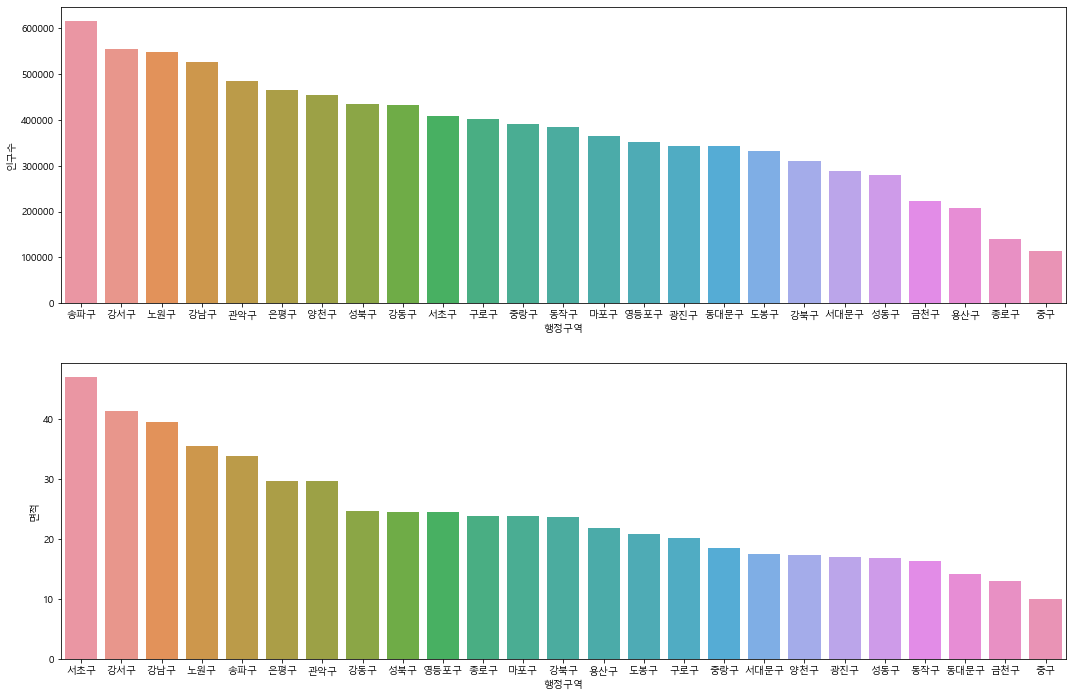

In [69]:
seoul_df = data.loc[data['광역시도'] == '서울특별시']
#Figure와 Axes 객체 2개 생성
figure,(axes1,axes2)=plt.subplots(nrows=2, ncols=1)
#figure size 조절
figure.set_size_inches(18,12)
print(figure)
print(axes1)
print(axes2)

#barplot() - x축에는 행정구역, y축에는 인구수
sns.barplot(x='행정구역', y='인구수', \
            data=seoul_df.sort_values(by='인구수',ascending=False), ax=axes1)
#barplot() - x축에는 행정구역, y축에는 면적
sns.barplot(x='행정구역', y='면적', \
            data=seoul_df.sort_values(by='면적',ascending=False), ax=axes2)

In [94]:
def show_barplot(sido_name):
    sido_df = data.loc[data['광역시도'] == sido_name]
    
    #Figure와 Axes 객체 2개 생성
    figure,(axes1,axes2)=plt.subplots(nrows=2, ncols=1)
    #figure size 조절
    figure.set_size_inches(18,12)
    print(figure)
    print(axes1)
    print(axes2)

    #barplot() - x축에는 행정구역, y축에는 인구수
    pop_plot = sns.barplot(x='행정구역', y='인구수', \
                data=sido_df.sort_values(by='인구수',ascending=False), ax=axes1)
    #해당plot에 타이틀을 설정
    pop_plot.set_title(f'{sido_name} 행정구역별 인구수')
    #barplot() - x축에는 행정구역, y축에는 면적
    area_plot = sns.barplot(x='행정구역', y='면적', \
                data=sido_df.sort_values(by='면적',ascending=False), ax=axes2)
    area_plot.set_title(f'{sido_name} 행정구역별 면적')

Figure(1296x864)
AxesSubplot(0.125,0.536818;0.775x0.343182)
AxesSubplot(0.125,0.125;0.775x0.343182)


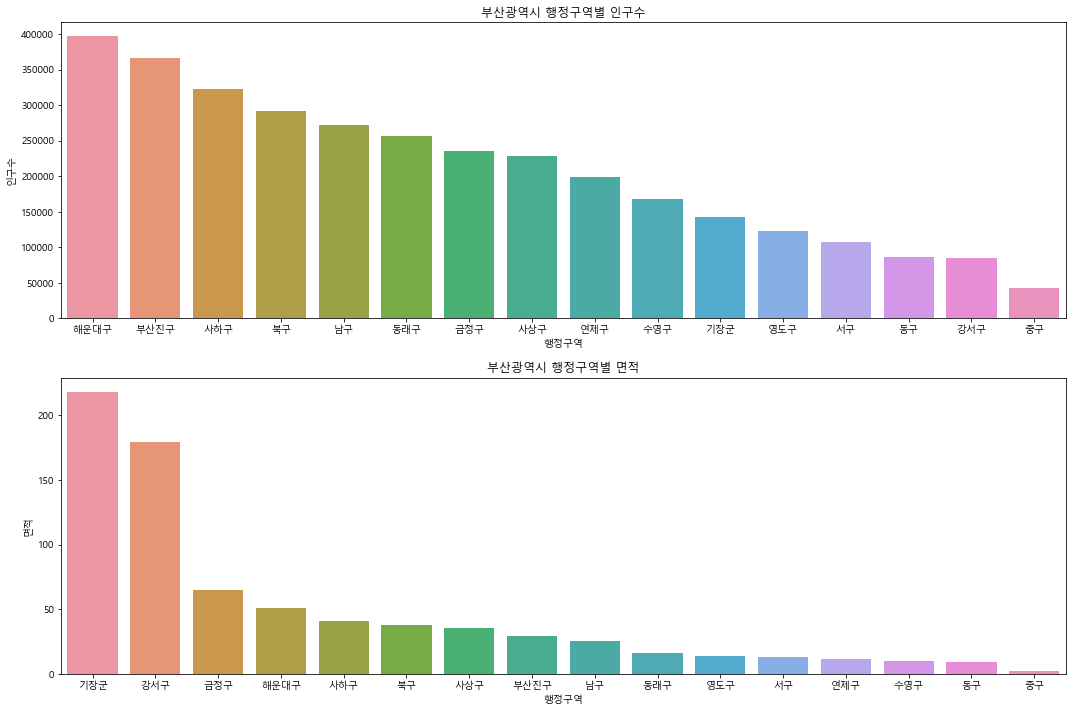

In [95]:
show_barplot('부산광역시')

In [108]:
### 전국의 광역시도별 인구수 시각화
#figure와 axes 생성 - figure에 1개의 axes를 작성
figure,axes1 = plt.subplots(nrows=1, ncols=1)
#figure size를 확대
figure.set_size_inches(18,12)
print(figure)
print(axes1)

#광역시도별 인구수
sns.barplot(x='광역시도',y='인구수',data=data,sort_values(by='인구수',ascending=False,ax=axes1)


SyntaxError: unexpected EOF while parsing (<ipython-input-108-77db54d09265>, line 10)